In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## test를 train과 같은 데이터 프레임으로 바꾸기

In [4]:
pre_test = pd.read_csv("parking_data/pre_test.csv", index_col=[0])
pre_test.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수
0,C1072,754,아파트,경기도,39.79,116,14.0,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,46.81,30,14.0,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,46.90,112,14.0,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,46.90,120,14.0,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,51.46,60,14.0,296780,0.0,2.0,683.0


In [5]:
category_test = pre_test.copy()
category_test["range"]=0
category_test.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,range
0,C1072,754,아파트,경기도,39.79,116,14.0,189840,0.0,2.0,683.0,0
1,C1072,754,아파트,경기도,46.81,30,14.0,249930,0.0,2.0,683.0,0
2,C1072,754,아파트,경기도,46.90,112,14.0,249930,0.0,2.0,683.0,0
3,C1072,754,아파트,경기도,46.90,120,14.0,249930,0.0,2.0,683.0,0
4,C1072,754,아파트,경기도,51.46,60,14.0,296780,0.0,2.0,683.0,0


In [6]:
for i in list(pre_test.index):
    if pre_test["전용면적"][i]<=20:
        category_test["range"][i]=10
    elif pre_test["전용면적"][i]<=30:
        category_test["range"][i] = 20
    elif pre_test["전용면적"][i]<=40:
        category_test["range"][i] = 30
    elif pre_test["전용면적"][i]<=50:
        category_test["range"][i]=40
    elif pre_test["전용면적"][i]<=60:
        category_test["range"][i] = 50
    elif pre_test["전용면적"][i]<=70:
        category_test["range"][i] = 60
    elif pre_test["전용면적"][i]<=80:
        category_test["range"][i] = 70
    elif pre_test["전용면적"][i]<=90:
        category_test["range"][i] = 80
    elif pre_test["전용면적"][i]<=100:
        category_test["range"][i] = 90
    else:
        category_test["range"][i]=100
        
category_test.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\4051930650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test["range"][i] = 30
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\4051930650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test["range"][i]=40
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\4051930650.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test["range"][i] = 50
C:\Users

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,range
0,C1072,754,아파트,경기도,39.79,116,14.0,189840,0.0,2.0,683.0,30
1,C1072,754,아파트,경기도,46.81,30,14.0,249930,0.0,2.0,683.0,40
2,C1072,754,아파트,경기도,46.90,112,14.0,249930,0.0,2.0,683.0,40
3,C1072,754,아파트,경기도,46.90,120,14.0,249930,0.0,2.0,683.0,40
4,C1072,754,아파트,경기도,51.46,60,14.0,296780,0.0,2.0,683.0,50


In [8]:
category_test_target = category_test[["단지코드","전용면적","전용면적별세대수","range"]]

code = list(category_test_target["단지코드"].unique())
len(code)

147

In [9]:
range_list = sorted(list(category_test_target["range"].unique()))
range_list

[10, 20, 30, 40, 50, 60, 70, 80, 100]

In [10]:
range_columns = []
for i in range_list:
    range_columns.append("area"+str(i))
    
range_columns

['area10',
 'area20',
 'area30',
 'area40',
 'area50',
 'area60',
 'area70',
 'area80',
 'area100']

In [11]:
for column in range_columns:
    category_test_target[column]=0
    
category_test_target.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\733828264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_target[column]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\733828264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_target[column]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\733828264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C1072,39.79,116,30,0,0,0,0,0,0,0,0,0
1,C1072,46.81,30,40,0,0,0,0,0,0,0,0,0
2,C1072,46.90,112,40,0,0,0,0,0,0,0,0,0
3,C1072,46.90,120,40,0,0,0,0,0,0,0,0,0
4,C1072,51.46,60,50,0,0,0,0,0,0,0,0,0


In [12]:
category_test_value=category_test_target.copy()
category_test_value.head()

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C1072,39.79,116,30,0,0,0,0,0,0,0,0,0
1,C1072,46.81,30,40,0,0,0,0,0,0,0,0,0
2,C1072,46.90,112,40,0,0,0,0,0,0,0,0,0
3,C1072,46.90,120,40,0,0,0,0,0,0,0,0,0
4,C1072,51.46,60,50,0,0,0,0,0,0,0,0,0


In [13]:
target_columns = category_test_value.columns[4:]

In [14]:
category_test_value = category_test_value.drop_duplicates("단지코드")
category_test_value.head()

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C1072,39.79,116,30,0,0,0,0,0,0,0,0,0
8,C1128,39.79,368,30,0,0,0,0,0,0,0,0,0
17,C1456,33.40,82,30,0,0,0,0,0,0,0,0,0
26,C1840,39.57,253,30,0,0,0,0,0,0,0,0,0
30,C1332,39.99,282,30,0,0,0,0,0,0,0,0,0


In [15]:
category_test_value = category_test_value.reset_index(drop=True)
category_test_value.head()

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C1072,39.79,116,30,0,0,0,0,0,0,0,0,0
1,C1128,39.79,368,30,0,0,0,0,0,0,0,0,0
2,C1456,33.40,82,30,0,0,0,0,0,0,0,0,0
3,C1840,39.57,253,30,0,0,0,0,0,0,0,0,0
4,C1332,39.99,282,30,0,0,0,0,0,0,0,0,0


In [25]:
for co in code:
    target = category_test_target[category_test_target["단지코드"]==co].groupby("range").sum()["전용면적별세대수"]
    category_test_value_index = category_test_value[category_test_value["단지코드"]==co].index[0]
    for i in range(len(target)):
        index1 = "area"+str(target.index[i])
        value = target.values[i]
        category_test_value[index1][category_test_value_index]=value
        
category_test_value.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test_value[index1][category_test_value_index]=value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_18580\1501496568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C1072,39.79,116,30,0,0,116,262,376,0,0,0,0
1,C1128,39.79,368,30,0,0,420,356,578,0,0,0,0
2,C1456,33.40,82,30,0,0,247,196,176,0,0,0,0
3,C1840,39.57,253,30,0,0,335,174,84,0,0,0,0
4,C1332,39.99,282,30,0,0,425,568,304,0,0,0,0


In [30]:
category_test_final = category_test.drop_duplicates("단지코드")
category_test_final

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,range
0,C1072,754,아파트,경기도,39.79,116,14.0,189840,0.0,2.0,683.0,30
8,C1128,1354,아파트,경기도,39.79,368,9.0,189840,0.0,3.0,1216.0,30
17,C1456,619,아파트,부산광역시,33.40,82,18.0,156200,0.0,16.0,547.0,30
26,C1840,593,아파트,전라북도,39.57,253,7.0,108130,0.0,3.0,543.0,30
30,C1332,1297,아파트,경기도,39.99,282,11.0,203050,0.0,2.0,1112.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
996,C2456,349,아파트,제주특별자치도,26.44,24,17.0,117000,0.0,4.0,270.0,20
1000,C1266,596,아파트,충청북도,26.94,164,35.0,149910,0.0,1.0,593.0,20
1005,C2152,120,아파트,강원도,24.83,66,9.0,-,0.0,1.0,40.0,20
1007,C1267,675,아파트,경상남도,24.87,28,38.0,104370,0.0,1.0,467.0,20


In [34]:
category_test_value_final = category_test_value[['단지코드', 'area10', 'area20', 'area30', 'area40', 'area50', 'area60', 'area70', 'area80', 'area100']]
category_test_value_final

,단지코드,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C1072,0,0,116,262,376,0,0,0,0
1,C1128,0,0,420,356,578,0,0,0,0
2,C1456,0,0,247,196,176,0,0,0,0
3,C1840,0,0,335,174,84,0,0,0,0
4,C1332,0,0,425,568,304,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
142,C2456,0,112,138,96,0,0,0,0,0
143,C1266,0,180,304,107,0,0,0,0,0
144,C2152,0,66,54,0,0,0,0,0,0
145,C1267,50,314,126,180,0,0,0,0,0


In [35]:
test_final = pd.merge(category_test_final, category_test_value_final, on="단지코드")
test_final.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,...,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C1072,754,아파트,경기도,39.79,116,14.0,189840,0.0,2.0,...,30,0,0,116,262,376,0,0,0,0
1,C1128,1354,아파트,경기도,39.79,368,9.0,189840,0.0,3.0,...,30,0,0,420,356,578,0,0,0,0
2,C1456,619,아파트,부산광역시,33.40,82,18.0,156200,0.0,16.0,...,30,0,0,247,196,176,0,0,0,0
3,C1840,593,아파트,전라북도,39.57,253,7.0,108130,0.0,3.0,...,30,0,0,335,174,84,0,0,0,0
4,C1332,1297,아파트,경기도,39.99,282,11.0,203050,0.0,2.0,...,30,0,0,425,568,304,0,0,0,0


In [37]:
test_final = test_final[['단지코드', '총세대수', '임대건물구분', '지역', '빈집', '노선수',
       '버스', 'area10', 'area20', 'area30', 'area40','area50', 'area60', 'area70', 'area80', 'area100', '주차면수']]
test_final.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,C1072,754,아파트,경기도,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,C1128,1354,아파트,경기도,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,C1456,619,아파트,부산광역시,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,C1840,593,아파트,전라북도,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,C1332,1297,아파트,경기도,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


In [39]:
test_final.to_csv("parking_data/면적별_세대수_구분_test.csv", index=False)

## 사용할 데이터 불러오기
- 단지코드 제외하기
- 등록차량수 y로 빼기

In [96]:
train = pd.read_csv("parking_data/면적별_세대수_구분.csv")
train.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0


In [97]:
train_x = train[train.columns[1:-1]]
train_y = train[train.columns[-1]]

display(train_x.head())
display(train_y.head())

,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0
1,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0
2,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0
3,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0
4,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0


0     205.0
1    1064.0
2     730.0
3     553.0
4     415.0
Name: 등록차량수, dtype: float64

In [98]:
train_x.info()
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     411 non-null    int64  
 1   임대건물구분   411 non-null    object 
 2   지역       411 non-null    object 
 3   빈집       411 non-null    float64
 4   노선수      411 non-null    float64
 5   버스       411 non-null    float64
 6   area10   411 non-null    int64  
 7   area20   411 non-null    int64  
 8   area30   411 non-null    int64  
 9   area40   411 non-null    int64  
 10  area50   411 non-null    int64  
 11  area60   411 non-null    int64  
 12  area70   411 non-null    int64  
 13  area80   411 non-null    int64  
 14  area100  411 non-null    int64  
 15  주차면수     411 non-null    float64
dtypes: float64(4), int64(10), object(2)
memory usage: 51.5+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 411 entries, 0 to 410
Series name: 등록차량수
Non-Null Count  Dtype  
--------------  -----  
411 non-nu

In [99]:
test = pd.read_csv("parking_data/면적별_세대수_구분_test.csv")
test.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,C1072,754,아파트,경기도,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,C1128,1354,아파트,경기도,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,C1456,619,아파트,부산광역시,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,C1840,593,아파트,전라북도,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,C1332,1297,아파트,경기도,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


In [100]:
test_x = test[test.columns[1:]]

display(test_x.head())
test_x.info()

,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,754,아파트,경기도,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,1354,아파트,경기도,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,619,아파트,부산광역시,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,593,아파트,전라북도,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,1297,아파트,경기도,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     147 non-null    int64  
 1   임대건물구분   147 non-null    object 
 2   지역       147 non-null    object 
 3   빈집       147 non-null    float64
 4   노선수      147 non-null    float64
 5   버스       147 non-null    float64
 6   area10   147 non-null    int64  
 7   area20   147 non-null    int64  
 8   area30   147 non-null    int64  
 9   area40   147 non-null    int64  
 10  area50   147 non-null    int64  
 11  area60   147 non-null    int64  
 12  area70   147 non-null    int64  
 13  area80   147 non-null    int64  
 14  area100  147 non-null    int64  
 15  주차면수     147 non-null    float64
dtypes: float64(4), int64(10), object(2)
memory usage: 18.5+ KB


## labelencoding 하기
- 임대건물구분
- 지역

# LabelEncoder를 쓸 것인지, 지역과 아파트에 각 숫자를 부여할 것인지!

In [101]:
label = ["임대건물구분","지역"]

le = LabelEncoder()
for i in label:
    le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    test_x[i] = le.transform(test_x[i])
    
display(train_x.head())
display(test_x.head())

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_17336\617615236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[i] = le.transform(train_x[i])
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_17336\617615236.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[i] = le.transform(test_x[i])


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,545,0,2,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0
1,1216,0,6,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0
2,755,0,1,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0
3,696,0,12,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0
4,566,0,12,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,754,0,1,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,1354,0,1,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,619,0,7,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,593,0,12,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,1297,0,1,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


## StandardScaler로 Scaling하기

In [10]:
train_x_scale = train_x.copy()
test_x_scale = test_x.copy()
scale = ['총세대수', '빈집', '노선수', '버스', 'area10', 'area20', 'area30',
       'area40', 'area50', 'area60', 'area70', 'area80', 'area100', '주차면수']

scaler = StandardScaler()
for i in scale:
    scaler.fit(train_x_scale[i].values.reshape(-1,1))
    train_x_scale[i] = scaler.transform(train_x_scale[i].values.reshape(-1,1))
    test_x_scale[i] = scaler.transform(test_x_scale[i].values.reshape(-1,1))
    
display(train_x.head())
display(test_x.head())
display(train_x_scale.head())
display(test_x_scale.head())

,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,545,0,2,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0
1,1216,0,6,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0
2,755,0,1,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0
3,696,0,12,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0
4,566,0,12,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,754,0,1,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,1354,0,1,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,619,0,7,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,593,0,12,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,1297,0,1,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,-0.435366,0,2,0.347522,-0.322966,-0.249910,-0.179522,-0.439933,0.575293,-0.607832,-0.117368,-0.06479,-0.191124,-0.204372,-0.236542,0.117650
1,1.211851,0,6,-0.040344,2.279760,-0.955841,-0.179522,-0.439933,0.732918,3.040852,-0.148595,-0.06479,-0.191124,-0.204372,-0.236542,1.955075
2,0.080157,0,1,-0.719109,2.279760,-0.249910,-0.179522,-0.439933,0.037517,-0.930274,1.377634,-0.06479,-0.191124,-0.204372,-0.236542,0.423424
3,-0.064681,0,12,0.056623,-0.322966,-0.602875,-0.179522,-0.439933,0.102421,0.178474,0.327620,-0.06479,-0.191124,-0.204372,-0.236542,0.176025
4,-0.383814,0,12,-0.428209,-0.322966,0.808986,-0.179522,-0.439933,0.181233,0.252013,-0.296924,-0.06479,-0.191124,-0.204372,-0.236542,-0.179785


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,0.077702,0,1,0.056623,-0.322966,-0.602875,-0.179522,-0.439933,-0.537348,0.551827,0.835061,-0.06479,-0.191124,-0.204372,-0.236542,0.281656
1,1.550623,0,1,-0.428209,-0.322966,-0.249910,-0.179522,-0.439933,0.871998,1.083574,1.623548,-0.06479,-0.191124,-0.204372,-0.236542,1.763272
2,-0.253706,0,7,0.444488,-0.322966,4.338641,-0.179522,-0.439933,0.069969,0.178474,0.054382,-0.06479,-0.191124,-0.204372,-0.236542,-0.096392
3,-0.317532,0,12,-0.622142,-0.322966,-0.249910,-0.179522,-0.439933,0.477937,0.054022,-0.304731,-0.06479,-0.191124,-0.204372,-0.236542,-0.107511
4,1.410696,0,1,-0.234276,-0.322966,-0.602875,-0.179522,-0.439933,0.895178,2.282831,0.554017,-0.06479,-0.191124,-0.204372,-0.236542,1.474176


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)
X_train.head()

,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
378,540,0,13,22.0,0.0,6.0,98,220,126,96,0,0,0,0,0,397.0
252,937,0,2,32.0,0.0,3.0,0,0,590,234,113,0,0,0,0,770.0
23,606,0,6,1.0,1.0,12.0,0,0,0,0,605,0,0,0,0,548.0
54,753,0,10,23.0,0.0,2.0,0,0,0,566,187,0,0,0,0,682.0
362,867,0,2,2.0,0.0,5.0,0,0,0,0,694,0,105,68,0,897.0


In [103]:
X_train = X_train[X_train.columns[:-1]]
X_val = X_val[X_val.columns[:-1]]

In [104]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_prediction = linear.predict(X_val)

from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(y_val, linear_prediction)
linear_mse

26897.924020662973

In [105]:
linear_prediction

array([ 990.32119341,  592.32787891,  141.12624024,  983.12984146,
       -155.68073244,  512.48066564,  628.87388219, 1174.19519325,
        -56.29239308,  940.6725154 , 1122.07958539, 1238.1350941 ,
        307.14625567,  269.58380869,  587.29790485,  659.43221387,
        232.92787399,  507.40335734,  655.49573156,  394.54567301,
        547.71528657, 1491.44609623,  667.78747432,   50.67872665,
        672.16354085, -116.4451178 ,  344.72653603,  438.61435923,
        284.01606032,  216.79024287,  467.45546816,  303.57269169,
        862.62856018,  441.3495044 ,  177.5878015 ,  900.7122196 ,
        564.46272256, 1417.86487356,  489.50630556,  143.95591135,
        596.84421333,  353.4630197 ,  650.01690303,  601.49691633,
        359.72967406,  470.65901453,  563.20852669,  232.31216527,
        332.12501405, 1038.77591717,  793.8596684 ,  616.67722631,
        899.16635492,  328.74056786,  505.84449076,  212.21064794,
        125.24337618,  184.515005  ,  514.73054692,  713.51159

In [106]:
y_val

133    808.0
75     548.0
375    133.0
404    619.0
61      60.0
       ...  
347    600.0
287    957.0
344    243.0
213    207.0
99     701.0
Name: 등록차량수, Length: 83, dtype: float64

In [107]:
np.sqrt(linear_mse)

164.00586581175372

In [108]:
print(linear.score(X_train, y_train))
print(linear.score(X_val, y_val))

0.7811205356889419
0.8056747015272936


In [99]:
random = RandomForestRegressor()
random.fit(X_train, y_train)
random_prediction = random.predict(X_val)

random_mse = mean_squared_error(y_val, random_prediction)
print(random_mse)
print(np.sqrt(random_mse))
print(random.score(X_train, y_train))
print(random.score(X_val, y_val))

44181.661212048195
210.1943415319456
0.9568745243363485
0.6799350913748499


In [87]:
X_train_scale, X_val_scale, y_train, y_val = train_test_split(train_x_scale, train_y, test_size=0.2)
X_train_scale.head()

,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
154,-0.833055,0,11,0.153589,-0.322966,0.103056,-0.179522,-0.439933,-0.671792,0.235042,-0.281311,-0.06479,-0.191124,-0.204372,-0.236542,-0.546714
333,2.360730,0,9,1.317186,-0.322966,-0.602875,-0.179522,2.067265,1.799199,1.230652,-0.632616,-0.06479,-0.191124,-0.204372,-0.236542,3.078101
403,0.495029,0,5,-1.300907,-0.322966,1.514917,-0.179522,1.427599,-0.055203,0.133219,-0.632616,-0.06479,-0.191124,-0.204372,-0.236542,0.228840
275,0.772430,0,0,0.347522,-0.322966,0.808986,-0.179522,0.111504,1.845559,-0.336302,-0.039300,-0.06479,-0.191124,-0.204372,-0.236542,0.984937
349,-1.049083,0,15,1.414152,-0.322966,-0.955841,-0.179522,0.350460,-0.741332,-0.885019,-0.632616,-0.06479,-0.191124,-0.204372,-0.236542,-1.152704


In [88]:
X_train_scale = X_train_scale[X_train_scale.columns[:-1]]
X_val_scale = X_val_scale[X_val_scale.columns[:-1]]

In [102]:
linear = LinearRegression()
linear.fit(X_train_scale, y_train)
linear_prediction_scale = linear.predict(X_val_scale)

linear_mse_scale = mean_squared_error(y_val, linear_prediction_scale)
linear_mse_scale

33256.738827968205

In [103]:
np.sqrt(linear_mse_scale)

182.36430250454228

In [105]:
print(linear.score(X_train_scale, y_train))
print(linear.score(X_val_scale, y_val))

0.7887745053596402
0.7675504214065738


In [107]:
random = RandomForestRegressor()
random.fit(X_train_scale, y_train)
random_prediction_scale = random.predict(X_val_scale)

random_mse_scale = mean_squared_error(y_val, random_prediction_scale)
print(random_mse_scale)
print(np.sqrt(random_mse_scale))
print(random.score(X_train_scale, y_train))
print(random.score(X_val_scale, y_val))

55829.96890120481
236.28366194302308
0.9634193955175285
0.6097737420647145


## 모델 만들기

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [17]:
X_train_scale.shape[1]

15

In [83]:
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer=SGD(learning_rate=1e-9), metrics=["mae"])
model.summary()
# learning_rate=0.0000001 : 최소 이렇게 해야 작동

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 15)                0         
                                                                 
 dense_71 (Dense)            (None, 64)                1024      
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_73 (Dense)            (None, 64)                4160      
                                                                 
 dense_74 (Dense)            (None, 64)                4160      
                                                                 
 dropout_19 (Dropout)        (None, 64)              

In [91]:
### scale
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer=SGD(learning_rate=1e-7), metrics=["mae"])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 15)                0         
                                                                 
 dense_81 (Dense)            (None, 64)                1024      
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_83 (Dense)            (None, 64)                4160      
                                                                 
 dense_84 (Dense)            (None, 64)                4160      
                                                                 
 dropout_23 (Dropout)        (None, 64)              

In [84]:
result = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))
# loss: 68277.5000 - mae: 182.1019 - val_loss: 30154.8789 - val_mae: 130.1481
# loss: 57468.2031 - mae: 171.1648 - val_loss: 54988.7422 - val_mae: 143.6591

Epoch 1/500
11/11 [==============================] - 1s 16ms/step - loss: 405496.2812 - mae: 477.6129 - val_loss: 163746.3125 - val_mae: 289.4508
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 323611.6250 - mae: 404.0242 - val_loss: 151006.3281 - val_mae: 270.8162
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 357458.2812 - mae: 419.6035 - val_loss: 124190.9375 - val_mae: 256.4721
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 273753.7188 - mae: 366.4110 - val_loss: 114114.4688 - val_mae: 241.9864
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 282425.2500 - mae: 379.9590 - val_loss: 109654.0703 - val_mae: 230.2833
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 270086.7812 - mae: 376.1245 - val_loss: 100525.6484 - val_mae: 219.3210
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 285600.3438 - mae: 381.4728 - val_loss: 99103.0938 - val

11/11 [==============================] - 0s 5ms/step - loss: 84283.4844 - mae: 203.5833 - val_loss: 56329.9023 - val_mae: 149.5045
Epoch 114/500
11/11 [==============================] - 0s 4ms/step - loss: 77192.7734 - mae: 193.2512 - val_loss: 56286.7812 - val_mae: 149.3795
Epoch 115/500
11/11 [==============================] - 0s 4ms/step - loss: 96392.7734 - mae: 222.0929 - val_loss: 56334.5859 - val_mae: 149.4316
Epoch 116/500
11/11 [==============================] - 0s 5ms/step - loss: 84626.4297 - mae: 213.1101 - val_loss: 56419.8906 - val_mae: 149.3818
Epoch 117/500
11/11 [==============================] - 0s 4ms/step - loss: 96302.2891 - mae: 217.1050 - val_loss: 56376.0859 - val_mae: 149.2676
Epoch 118/500
11/11 [==============================] - 0s 4ms/step - loss: 95380.5312 - mae: 222.2032 - val_loss: 56706.9648 - val_mae: 149.5335
Epoch 119/500
11/11 [==============================] - 0s 5ms/step - loss: 85286.6406 - mae: 207.7402 - val_loss: 56509.2891 - val_mae: 149.1231

11/11 [==============================] - 0s 4ms/step - loss: 79336.8750 - mae: 193.2230 - val_loss: 55622.9531 - val_mae: 146.2604
Epoch 226/500
11/11 [==============================] - 0s 5ms/step - loss: 77729.0703 - mae: 188.0493 - val_loss: 55745.4258 - val_mae: 146.2566
Epoch 227/500
11/11 [==============================] - 0s 4ms/step - loss: 80087.0859 - mae: 187.5870 - val_loss: 56596.8477 - val_mae: 147.0262
Epoch 228/500
11/11 [==============================] - 0s 4ms/step - loss: 85635.3594 - mae: 205.6061 - val_loss: 56614.6562 - val_mae: 147.3143
Epoch 229/500
11/11 [==============================] - 0s 5ms/step - loss: 70254.4297 - mae: 189.6143 - val_loss: 56988.7695 - val_mae: 147.8418
Epoch 230/500
11/11 [==============================] - 0s 4ms/step - loss: 74576.7891 - mae: 191.4477 - val_loss: 56097.3438 - val_mae: 145.9615
Epoch 231/500
11/11 [==============================] - 0s 5ms/step - loss: 89572.3828 - mae: 205.3359 - val_loss: 56305.3867 - val_mae: 146.2301

11/11 [==============================] - 0s 4ms/step - loss: 72900.5469 - mae: 186.0133 - val_loss: 55606.3789 - val_mae: 144.8827
Epoch 338/500
11/11 [==============================] - 0s 4ms/step - loss: 55988.6836 - mae: 172.2886 - val_loss: 55817.8359 - val_mae: 145.2461
Epoch 339/500
11/11 [==============================] - 0s 4ms/step - loss: 69021.3047 - mae: 179.5194 - val_loss: 55731.5117 - val_mae: 145.1071
Epoch 340/500
11/11 [==============================] - 0s 5ms/step - loss: 61304.1523 - mae: 174.8097 - val_loss: 55602.8125 - val_mae: 144.7077
Epoch 341/500
11/11 [==============================] - 0s 5ms/step - loss: 74600.8750 - mae: 183.0608 - val_loss: 55334.6992 - val_mae: 144.5534
Epoch 342/500
11/11 [==============================] - 0s 5ms/step - loss: 71721.4609 - mae: 188.0951 - val_loss: 55311.6211 - val_mae: 144.7897
Epoch 343/500
11/11 [==============================] - 0s 5ms/step - loss: 81568.6797 - mae: 188.9139 - val_loss: 55028.9453 - val_mae: 144.7825

11/11 [==============================] - 0s 5ms/step - loss: 57862.6172 - mae: 169.9096 - val_loss: 55060.9023 - val_mae: 144.0548
Epoch 450/500
11/11 [==============================] - 0s 6ms/step - loss: 64139.6211 - mae: 181.1116 - val_loss: 55238.3633 - val_mae: 144.1731
Epoch 451/500
11/11 [==============================] - 0s 4ms/step - loss: 65660.9141 - mae: 173.8665 - val_loss: 55216.0000 - val_mae: 144.0902
Epoch 452/500
11/11 [==============================] - 0s 5ms/step - loss: 76086.2188 - mae: 187.2899 - val_loss: 55243.6523 - val_mae: 144.1211
Epoch 453/500
11/11 [==============================] - 0s 5ms/step - loss: 60579.5625 - mae: 176.5130 - val_loss: 55601.0117 - val_mae: 144.5492
Epoch 454/500
11/11 [==============================] - 0s 5ms/step - loss: 58502.0664 - mae: 163.2741 - val_loss: 55749.1445 - val_mae: 144.5460
Epoch 455/500
11/11 [==============================] - 0s 5ms/step - loss: 67893.2109 - mae: 185.0295 - val_loss: 55810.9258 - val_mae: 144.6123

In [92]:
result = model.fit(X_train_scale, y_train, epochs=500, validation_data=(X_val_scale, y_val))
# loss: 277222.2812 - mae: 421.4816 - val_loss: 276797.8125 - val_mae: 420.2255

Epoch 1/500
11/11 [==============================] - 1s 16ms/step - loss: 474436.7812 - mae: 566.6724 - val_loss: 387355.8750 - val_mae: 508.5224
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 466817.2812 - mae: 559.7202 - val_loss: 380047.3750 - val_mae: 501.1100
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 460359.6250 - mae: 553.4014 - val_loss: 372532.2500 - val_mae: 493.6937
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 451935.9062 - mae: 545.6673 - val_loss: 364138.0938 - val_mae: 485.7668
Epoch 5/500
11/11 [==============================] - 0s 5ms/step - loss: 443924.1875 - mae: 537.7606 - val_loss: 354772.3750 - val_mae: 476.6094
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 435223.9062 - mae: 528.5242 - val_loss: 344199.5938 - val_mae: 465.8301
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 427468.1562 - mae: 520.3535 - val_loss: 332657.2812 - va

11/11 [==============================] - 0s 4ms/step - loss: 70790.1719 - mae: 212.0468 - val_loss: 51270.8086 - val_mae: 183.6497
Epoch 114/500
11/11 [==============================] - 0s 5ms/step - loss: 70219.9844 - mae: 211.8841 - val_loss: 49974.5586 - val_mae: 181.1356
Epoch 115/500
11/11 [==============================] - 0s 4ms/step - loss: 70418.5938 - mae: 204.5954 - val_loss: 47560.7656 - val_mae: 181.3294
Epoch 116/500
11/11 [==============================] - 0s 4ms/step - loss: 63298.5859 - mae: 197.9427 - val_loss: 47221.6680 - val_mae: 182.2397
Epoch 117/500
11/11 [==============================] - 0s 5ms/step - loss: 66835.6406 - mae: 203.6380 - val_loss: 46047.5195 - val_mae: 174.5538
Epoch 118/500
11/11 [==============================] - 0s 5ms/step - loss: 64025.9883 - mae: 199.7667 - val_loss: 45033.6641 - val_mae: 174.6930
Epoch 119/500
11/11 [==============================] - 0s 4ms/step - loss: 63044.8906 - mae: 190.6070 - val_loss: 44459.5469 - val_mae: 175.0952

11/11 [==============================] - 0s 5ms/step - loss: 45809.4766 - mae: 147.1106 - val_loss: 28092.7773 - val_mae: 126.9211
Epoch 226/500
11/11 [==============================] - 0s 5ms/step - loss: 45381.6406 - mae: 146.2342 - val_loss: 25524.2285 - val_mae: 117.4393
Epoch 227/500
11/11 [==============================] - 0s 5ms/step - loss: 40174.8008 - mae: 137.7940 - val_loss: 26084.4883 - val_mae: 118.7961
Epoch 228/500
11/11 [==============================] - 0s 4ms/step - loss: 45842.0273 - mae: 144.2296 - val_loss: 25954.3281 - val_mae: 118.2333
Epoch 229/500
11/11 [==============================] - 0s 4ms/step - loss: 47540.5117 - mae: 149.1203 - val_loss: 26174.6211 - val_mae: 118.7456
Epoch 230/500
11/11 [==============================] - 0s 5ms/step - loss: 47849.4531 - mae: 153.7526 - val_loss: 26322.7168 - val_mae: 120.3847
Epoch 231/500
11/11 [==============================] - 0s 4ms/step - loss: 44047.9961 - mae: 141.4061 - val_loss: 27828.2402 - val_mae: 126.4674

11/11 [==============================] - 0s 4ms/step - loss: 48272.6875 - mae: 148.5066 - val_loss: 26520.8047 - val_mae: 120.3092
Epoch 338/500
11/11 [==============================] - 0s 5ms/step - loss: 43615.8711 - mae: 144.8610 - val_loss: 26122.5156 - val_mae: 118.8957
Epoch 339/500
11/11 [==============================] - 0s 4ms/step - loss: 44677.1055 - mae: 146.2064 - val_loss: 28148.8125 - val_mae: 126.2968
Epoch 340/500
11/11 [==============================] - 0s 4ms/step - loss: 43504.5625 - mae: 144.5168 - val_loss: 25938.8262 - val_mae: 117.8646
Epoch 341/500
11/11 [==============================] - 0s 4ms/step - loss: 39968.9922 - mae: 140.9548 - val_loss: 26549.5488 - val_mae: 118.7383
Epoch 342/500
11/11 [==============================] - 0s 5ms/step - loss: 47887.6953 - mae: 150.7956 - val_loss: 26627.7715 - val_mae: 121.5824
Epoch 343/500
11/11 [==============================] - 0s 4ms/step - loss: 44027.9492 - mae: 145.1827 - val_loss: 28103.3262 - val_mae: 127.2074

11/11 [==============================] - 0s 5ms/step - loss: 42439.3828 - mae: 142.1762 - val_loss: 26096.9668 - val_mae: 119.6545
Epoch 450/500
11/11 [==============================] - 0s 4ms/step - loss: 42778.2305 - mae: 144.6765 - val_loss: 25089.0781 - val_mae: 116.4414
Epoch 451/500
11/11 [==============================] - 0s 5ms/step - loss: 39412.8945 - mae: 137.7384 - val_loss: 25437.5332 - val_mae: 117.6433
Epoch 452/500
11/11 [==============================] - 0s 5ms/step - loss: 46226.5781 - mae: 147.7716 - val_loss: 25225.7285 - val_mae: 116.8711
Epoch 453/500
11/11 [==============================] - 0s 4ms/step - loss: 46414.9375 - mae: 148.2691 - val_loss: 26031.0566 - val_mae: 119.1234
Epoch 454/500
11/11 [==============================] - 0s 5ms/step - loss: 42223.4219 - mae: 141.2014 - val_loss: 25474.2949 - val_mae: 117.2908
Epoch 455/500
11/11 [==============================] - 0s 4ms/step - loss: 48034.0625 - mae: 151.6834 - val_loss: 25000.5566 - val_mae: 116.4604

In [111]:
model.predict(X_val_scale)

3/3 [==============================] - 0s 1ms/step


array([[ 414.3714  ],
       [ 528.14844 ],
       [ 624.06177 ],
       [ 658.7427  ],
       [ -38.98525 ],
       [ 888.41394 ],
       [ 419.88687 ],
       [  10.064046],
       [ 522.0689  ],
       [ 359.8637  ],
       [ 680.8147  ],
       [ 287.80774 ],
       [ 212.52356 ],
       [ 357.58646 ],
       [ 524.34424 ],
       [1266.2345  ],
       [ 448.3815  ],
       [ 852.0791  ],
       [  81.432655],
       [1101.606   ],
       [ 648.29816 ],
       [ 366.3669  ],
       [ 188.74547 ],
       [ 675.72766 ],
       [ 685.16077 ],
       [ 514.1656  ],
       [ 269.76404 ],
       [ 816.32324 ],
       [ 561.8993  ],
       [ 608.5426  ],
       [ 694.3232  ],
       [ 204.65114 ],
       [ 485.83005 ],
       [ 374.26926 ],
       [ 441.98648 ],
       [ 358.80704 ],
       [ 418.67465 ],
       [ 680.1432  ],
       [ 699.2385  ],
       [1171.7786  ],
       [ 577.8249  ],
       [ 503.5539  ],
       [ 274.14853 ],
       [ 396.5439  ],
       [-106.19013 ],
       [ 1

In [113]:
np.sqrt(276797.8125)

526.115778607713

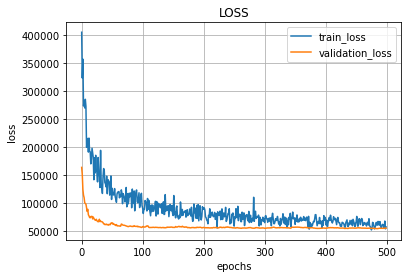

In [85]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

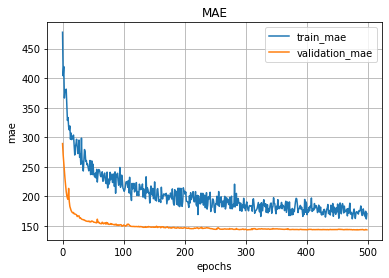

In [86]:
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")

In [ ]:
# 단순하게 돌렸을 때 이정도
# feature를 넣고 빼고 해서 여러 방법으로 돌려봐야할 듯
# linear >> 과적합은 적으나 훈련데이터도 성적이 그렇게 높지 않음
# random >> 훈련데이터 성적은 좋으나 과적합이 높음
# tensorflow 딥러닝 >> 성적이 그렇게 좋지 않음
# 다른 방법을 써봐야 할 것 같음
# 컬럼 나누기!(어떻게 넣을 것인가)

In [55]:
np.sqrt(208427.5156)

456.53862443390267

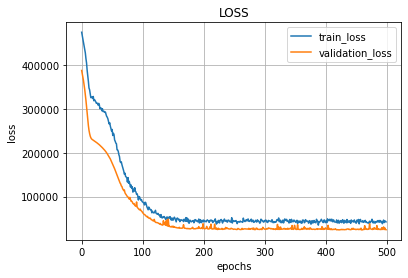

In [93]:
### scale
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

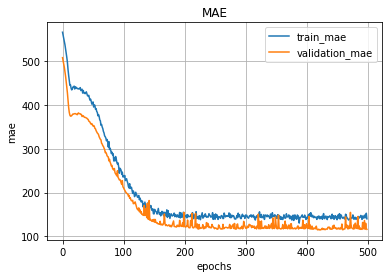

In [94]:
### scale
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")

In [ ]:
# scale한 건 learning_rate를 좀 더 올려야 함 >> epochs수를 늘렸어야 했나?